In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import keras

Using TensorFlow backend.


In [2]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 234us/step - loss: 1.1247 - val_loss: 0.2733
Epoch 2/100
500/500 [==============================] - 0s 34us/step - loss: 0.2984 - val_loss: 0.1389
Epoch 3/100
500/500 [==============================] - 0s 36us/step - loss: 0.1306 - val_loss: 0.1317
Epoch 4/100
500/500 [==============================] - 0s 32us/step - loss: 0.1101 - val_loss: 0.1117
Epoch 5/100
500/500 [==============================] - 0s 32us/step - loss: 0.1051 - val_loss: 0.1073
Epoch 6/100
500/500 [==============================] - 0s 30us/step - loss: 0.1042 - val_loss: 0.1069
Epoch 7/100
500/500 [==============================] - 0s 32us/step - loss: 0.1037 - val_loss: 0.1071
Epoch 8/100
500/500 [==============================] - 0s 34us/step - loss: 0.1034 - val_loss: 0.1077
Epoch 9/100
500/500 [==============================] - 0s 32us/step - loss: 0.1036 - val_loss: 0.1068
Epoch 10/100
500/500 [=============

Epoch 80/100
500/500 [==============================] - 0s 32us/step - loss: 0.1033 - val_loss: 0.1073
Epoch 81/100
500/500 [==============================] - 0s 32us/step - loss: 0.1036 - val_loss: 0.1073
Epoch 82/100
500/500 [==============================] - 0s 30us/step - loss: 0.1036 - val_loss: 0.1070
Epoch 83/100
500/500 [==============================] - 0s 30us/step - loss: 0.1036 - val_loss: 0.1070
Epoch 84/100
500/500 [==============================] - 0s 28us/step - loss: 0.1036 - val_loss: 0.1069
Epoch 85/100
500/500 [==============================] - 0s 30us/step - loss: 0.1037 - val_loss: 0.1073
Epoch 86/100
500/500 [==============================] - 0s 30us/step - loss: 0.1035 - val_loss: 0.1067
Epoch 87/100
500/500 [==============================] - 0s 30us/step - loss: 0.1034 - val_loss: 0.1073
Epoch 88/100
500/500 [==============================] - 0s 30us/step - loss: 0.1035 - val_loss: 0.1072
Epoch 89/100
500/500 [==============================] - 0s 32us/step - lo

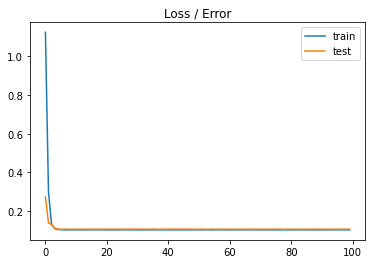

In [3]:
# mlp with scaled inputs outputs on the regression problem
# define model
model = Sequential()
model.add(Dense(1, input_dim=20, activation='linear', kernel_initializer='he_uniform', kernel_regularizer= keras.regularizers.l2(l=.1)))
#compile the model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)
# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e, test_e)) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

How do you change the ridge regression to a lasso regression? You change the regularization from l2 to l1.